In [1]:
import pandas as pd
# see orig on https://www.bmc.com/blogs/pandas-basics/

In [6]:
df = pd.DataFrame([["Fred",80],["Jill",90]],columns=["student", "grade"])

In [7]:
df

,student,grade
0,Fred,80
1,Jill,90


In [8]:
# почему бы не сделать это индексом?
df.set_index("student",inplace=True)
df

,grade
student,
Fred,80
Jill,90


In [22]:
df['birthdate']=['1970-01-12', '1972-05-12']
df

,grade,birthdate
student,,
Fred,80,1970-01-12
Jill,90,1972-05-12


In [25]:
# loc by label
df.loc["Fred"]

grade                80
birthdate    1970-01-12
Name: Fred, dtype: object

In [26]:
# loc by index
df.iloc[0]

grade                80
birthdate    1970-01-12
Name: Fred, dtype: object

In [27]:
# filter?
df[df['birthdate']=='1970-01-12']

,grade,birthdate
student,,
Fred,80,1970-01-12


In [30]:
# доступ к столбцу как в словаре
grade=df['grade']
grade

student
Fred    80
Jill    90
Name: grade, dtype: int64

In [31]:
# при доступе к столбцу получается Series
type(grade)

pandas.core.series.Series

In [51]:
# доступ к столбцу как в словаре
grade=df[['grade']]
grade

,grade
student,
Fred,80
Jill,90


In [53]:
# при доступе через двойные скобки получается DataFrame
type(grade)

pandas.core.frame.DataFrame

In [33]:
# add rows is tough
df2 = pd.DataFrame([[70,'1980-11-12'],[97, '1984-11-01']],index=["Costas", "Ilya"], columns=["grade", "birthdate"])
df3=df.append(df2)

df3

,grade,birthdate
Fred,80,1970-01-12
Jill,90,1972-05-12
Costas,70,1980-11-12
Ilya,97,1984-11-01


In [35]:
# loc slice
df.iloc[0:2]

,grade,birthdate
student,,
Fred,80,1970-01-12
Jill,90,1972-05-12


### Приведение типов

In [37]:
bday=pd.to_datetime(df3['birthdate'])
bday

Fred     1970-01-12
Jill     1972-05-12
Costas   1980-11-12
Ilya     1984-11-01
Name: birthdate, dtype: datetime64[ns]

### Map - давайте вычислим возраст

In [40]:
from datetime import datetime 
import numpy as np

today = datetime.now()
today

datetime.datetime(2021, 3, 16, 8, 50, 21, 527774)

In [47]:
days_365 = np.timedelta64(365, 'D')
print(days_365)

365 days


In [48]:
# datetime умеет в арифметические операции
ages = bday.map(lambda l: int((today-l)/days_365))
ages

Fred      51
Jill      48
Costas    40
Ilya      36
Name: birthdate, dtype: int64

In [49]:
# новый столбец можно создать как в словаре
df3['age'] = ages
df3

,grade,birthdate,age
Fred,80,1970-01-12,51
Jill,90,1972-05-12,48
Costas,70,1980-11-12,40
Ilya,97,1984-11-01,36


### Можно и графики сразу построить

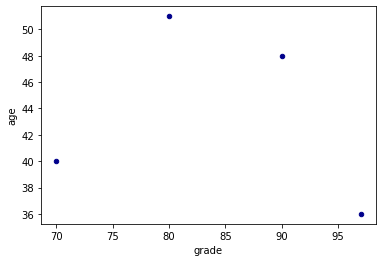

In [54]:
# pandas в бэкенде импортирует matplotlib
df3[['grade','age']].plot.scatter(x='grade',
                      y='age',
                      c='DarkBlue')

In [55]:
# а корр. матрицу построить?
df3[['grade','age']].corr()

,grade,age
grade,1.000000,-0.210699
age,-0.210699,1.000000
